Problem Statement : We have Advertising dataset in which we have TV , Radio and newspaper as our advertising medium. we want to predict the sale with respect to these 3 features. 

## Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression , Ridge , Lasso , RidgeCV, LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import PolynomialFeatures

## EDA

In [3]:
df = pd.read_csv('Desktop/LinearRegression-master/LinearRegressionTillCloud/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(["Unnamed: 0"], axis = 1 , inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


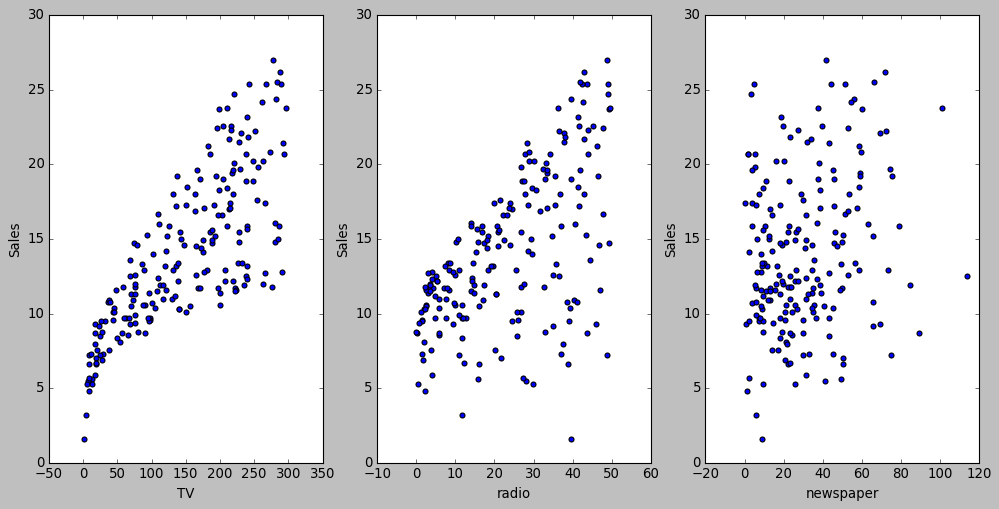

In [15]:
plt.style.use("classic")
fig = plt.figure(figsize=(15,7))
for i in range(3):
    ax = plt.subplot(1,3, i+1)
    ax.scatter(df.iloc[:,i], df["sales"])
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel("Sales")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [18]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


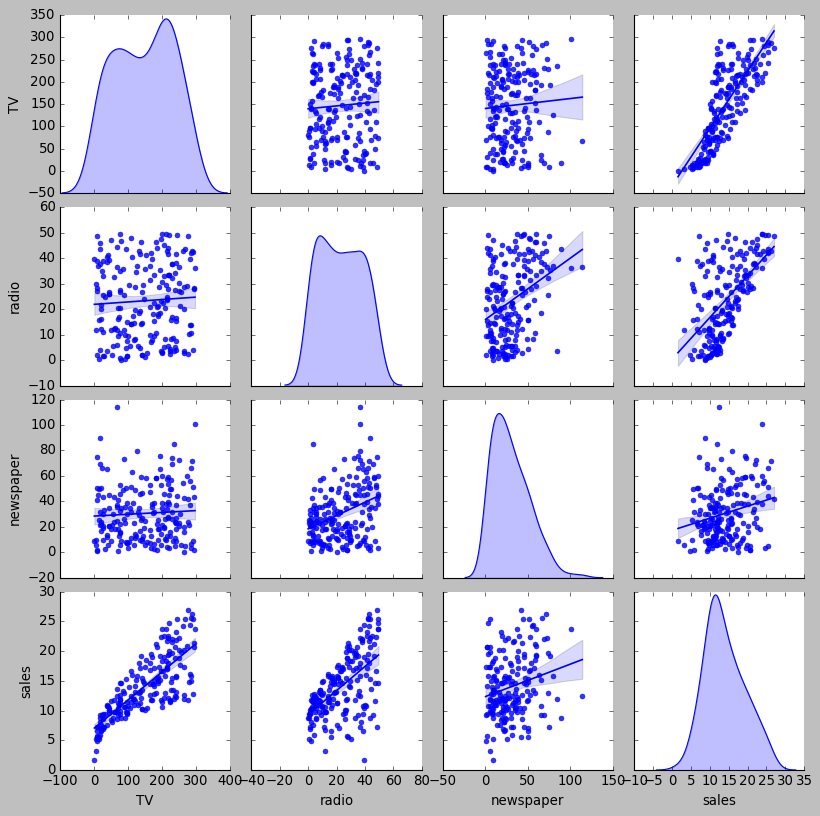

In [28]:
sns.pairplot(df, kind='reg', diag_kind="kde")

## Data Transformation

In [30]:
X = df.iloc[:,0:3]
y = df[["sales"]]

In [59]:
sc = StandardScaler()
X_ = sc.fit_transform(X)
#X_ = pd.DataFrame(X_)

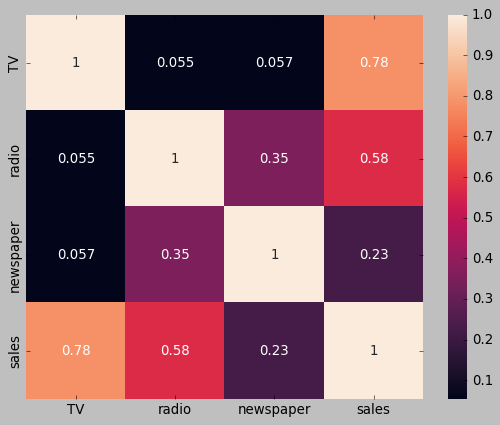

In [20]:
sns.heatmap(df.corr(), annot = True)

In [46]:
vif = []
for i in range(X_.shape[1]):
    vif.append(variance_inflation_factor(X_,i))

In [49]:
pd.DataFrame({"Features": df.columns[0:3], "VIF": vif})

,Features,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


In [62]:
X_ = pd.DataFrame(X_, columns=df.columns[0:3])

In [63]:
X_.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


## Model Selection

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X_ , y , test_size = 0.25, random_state = 101)

In [67]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9246764680774093

In [69]:
lr = Lasso()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8411378813810304

In [70]:
lr = LassoCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9236097570228159

In [71]:
lr = Ridge()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9242523437393457

In [72]:
lr = RidgeCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9246373482296097

In [73]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9246764680774093

## Fining Tuning

In [80]:
deg = [1,2,3,4]
for i in deg:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_)
    x_train, x_test, y_train, y_test = train_test_split(X_poly , y , test_size = 0.25, random_state = 101)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print(lr.score(x_test, y_test))

0.9246764680774093
0.987993991911166
0.9895296485136732
-0.34524264675872507


In [81]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_)
x_train, x_test, y_train, y_test = train_test_split(X_poly , y , test_size = 0.25, random_state = 101)
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9895296485136732

## Saving models for deployment

In [82]:
pickle.dump(lr, open("Desktop/Advertising/model.pickle", "wb"))
pickle.dump(sc, open("Desktop/Advertising/scaler.pickle", "wb"))
pickle.dump(poly, open("Desktop/Advertising/poly.pickle", "wb"))